In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data from specific subject
# Choose to read both blocks or not
def fmri_signal(subject=1, all_blocks=False):
    if all_blocks==True:
        a=np.loadtxt("../Data/fMRI/subj"+str(subject)+"_block1.txt")
        b=np.loadtxt("../Data/fMRI/subj"+str(subject)+"_block2.txt")
        return np.concatenate((a,b))
    elif all_blocks==False:
        a=np.loadtxt("../Data/fMRI/subj"+str(subject)+"_block1.txt")
        return a

In [3]:
#Compute FC for all subjects
correlations=np.zeros((24,66,66), dtype=np.float64)
for subj in range(1,25,1):
    correlations[subj-1]=np.corrcoef(fmri_signal(subj, all_blocks=True), rowvar=False)

#Take the mean of all 24 FC matrix
corr=np.mean(correlations, axis=0)
correlations.shape

(24, 66, 66)

In [4]:
# Load data for subject 2
subject=2
signal=fmri_signal(subject, True)
print(signal.shape)
# Compute FC for subj 2
fc=np.corrcoef(signal, rowvar=False)


(600, 66)


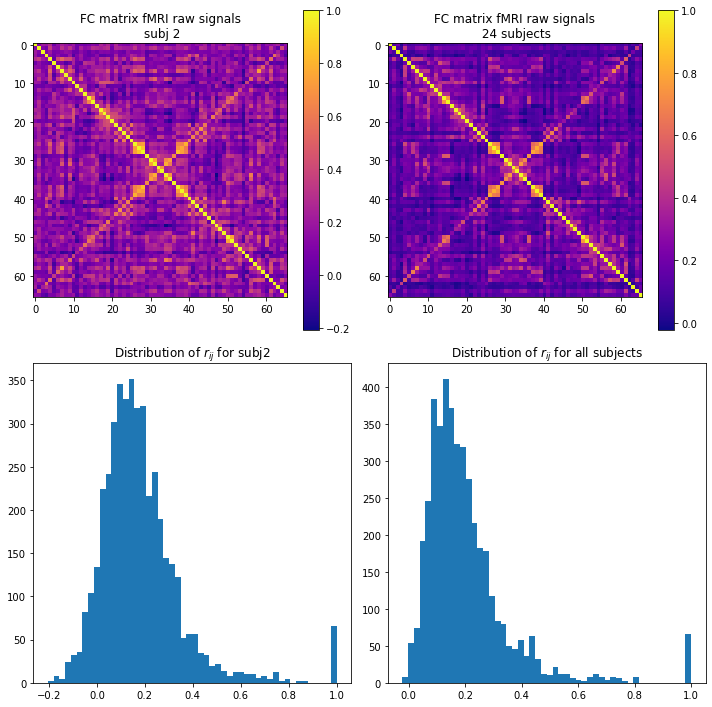

In [5]:
plt.figure( figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(fc,cmap='plasma')
plt.colorbar()
plt.title("FC matrix fMRI raw signals\n subj "+str(subject))

plt.subplot(2,2,2)
plt.imshow(corr, cmap='plasma')
plt.title("FC matrix fMRI raw signals\n 24 subjects")
plt.colorbar()

plt.subplot(2,2,3)
\plt.title("Distribution of $r_{ij}$ for subj"+str(subject))

plt.subplot(2,2,4)
plt.hist(corr.flatten(), bins=50)
plt.title("Distribution of $r_{ij}$ for all subjects")


plt.tight_layout()
plt.show()

In [11]:
np.histogram(corr.flatten(), bins=50)

(array([  8,  54,  74, 192, 246, 384, 348, 412, 372, 324, 320, 276, 216,
        182, 178, 118,  84,  80,  50,  46,  58,  36,  64,  32,  12,  10,
         22,  12,  12,   6,   4,   2,   8,  12,   8,   4,   8,   6,   2,
          0,   8,   0,   0,   0,   0,   0,   0,   0,   0,  66]),
 array([-0.02257647, -0.00212494,  0.01832659,  0.03877812,  0.05922965,
         0.07968118,  0.10013271,  0.12058424,  0.14103577,  0.1614873 ,
         0.18193883,  0.20239036,  0.22284189,  0.24329342,  0.26374495,
         0.28419647,  0.304648  ,  0.32509953,  0.34555106,  0.36600259,
         0.38645412,  0.40690565,  0.42735718,  0.44780871,  0.46826024,
         0.48871177,  0.5091633 ,  0.52961483,  0.55006636,  0.57051788,
         0.59096941,  0.61142094,  0.63187247,  0.652324  ,  0.67277553,
         0.69322706,  0.71367859,  0.73413012,  0.75458165,  0.77503318,
         0.79548471,  0.81593624,  0.83638777,  0.85683929,  0.87729082,
         0.89774235,  0.91819388,  0.93864541,  0.95909694,